## Importing Libraries and Data Sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_original = pd.read_csv("train.csv")
test_original = pd.read_csv("test.csv")

### Create a duplicate train and test for manipulation

In [3]:
train = train_original
test = test_original

## Check for NA values

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Fill NA values
Fill NA values with median


In [5]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [6]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [7]:
train = train.drop(["Cabin","Name","Ticket","PassengerId"],axis = 1)
test = test.drop(["Cabin","Name","Ticket","PassengerId"],axis = 1)

## Split variables into Dependent and Independent Variables

In [8]:
X = pd.DataFrame(train.drop(["Survived"],axis = 1))
y = pd.DataFrame(train["Survived"])

## Encoding Categorical Variables with Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ["Sex","Embarked"]:
  X[i] = le.fit_transform(X[i])
  test[i] = le.transform(test[i])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## Split Data into training and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Training the Logistic Regression model on the Training set

In [12]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [13]:
y_pred_lr = lr_classifier.predict(X_test)

### Confusion Matrix and Accuracy Score (LogReg)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
lr_cm = confusion_matrix(y_test,y_pred_lr)
lr_cm

array([[92, 18],
       [18, 51]])

Text(0.5, 15.0, 'Predicted Survival')

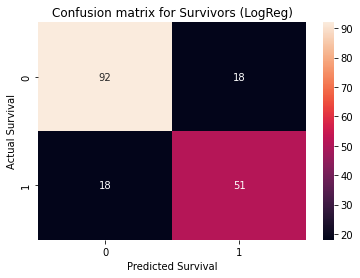

In [16]:
sns.heatmap(pd.DataFrame(lr_cm), annot=True, fmt='g')
plt.title('Confusion matrix for Survivors (LogReg)')
plt.ylabel('Actual Survival')
plt.xlabel('Predicted Survival')

In [17]:
accuracy_score(y_test, y_pred_lr)

0.7988826815642458

## Training the XGBoost Classifier model on the Training set

In [18]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(objective = "binary:logistic")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
y_pred_xgb = xgb_classifier.predict(X_test)

### Confusion Matrix and Accuracy Score (XGB Classifier)

In [20]:
xgb_cm = confusion_matrix(y_test,y_pred_xgb)

Text(0.5, 15.0, 'Predicted Survival')

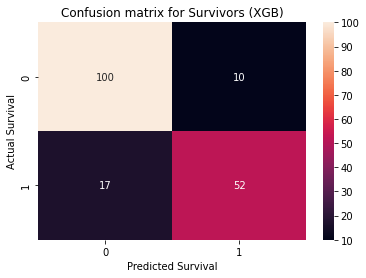

In [21]:
sns.heatmap(pd.DataFrame(xgb_cm), annot=True,fmt='g')
plt.title('Confusion matrix for Survivors (XGB)')
plt.ylabel('Actual Survival')
plt.xlabel('Predicted Survival')

In [22]:
accuracy_score(y_test, y_pred_xgb)

0.8491620111731844

## Applying k-Fold Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
accuracies_logreg = cross_val_score(estimator = lr_classifier, X = X_train, y = y_train, cv = 10)
accuracies_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [24]:
print('Accuracy (LogReg): {:.2f}%'.format(accuracies_logreg.mean()*100))
print('Standard Deviation (LogReg): {:.2f}% \n'.format(accuracies_logreg.std()*100))

print('Accuracy (XGB Classifier): {:.2f}%'.format(accuracies_xgb.mean()*100))
print('Standard Deviation (XGB Classifier): {:.2f}%'.format(accuracies_xgb.std()*100))

Accuracy (LogReg): 78.38%
Standard Deviation (LogReg): 3.89% 

Accuracy (XGB Classifier): 80.49%
Standard Deviation (XGB Classifier): 2.97%


## Output results

In [25]:
# LogReg Results
test_result_logreg = pd.concat([pd.DataFrame(lr_classifier.predict(test),columns = ["Survived"]),test], axis = 1)
# XGB Classifier Results
test_result_xgb = pd.concat([pd.DataFrame(xgb_classifier.predict(test),columns = ["Survived"]),test], axis = 1)

In [26]:
test_result_logreg.to_csv('titanic_test_logreg.csv')
test_result_xgb.to_csv('titanic_test_xgb.csv')